In [1]:
import csv
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib.colors import ListedColormap
from scipy import ndimage
import imageio
import plotly
import plotly.graph_objs as go


with open('/home/garner1/Work/dataset/cellImages/image52/properties.csv', 'r') as f:
    properties = list(csv.reader(f, delimiter=','))
properties = np.array(properties)

image = imageio.imread('/home/garner1/Work/dataset/cellImages/image52/iMS266_20190426_001.sub52.jpg')
sns.set(style='white', rc={'figure.figsize':(50,30)})

plt.scatter(properties[1:,1].astype(np.float),
            properties[1:,2].astype(np.float),
            c='b',
            s=100,
#             cmap='Spectral',
            alpha=0.9);
plt.imshow(image,cmap='gray')
plt.show()

<Figure size 5000x3000 with 1 Axes>

Use UMAP to represent nuclei locations in the original image

In [2]:
import umap

X = properties[1:,1:3].astype(np.float)

'''2D embedding'''
n_neighbors = 20
n_components = 2
trans = umap.UMAP(n_neighbors=n_neighbors,min_dist=0.0,n_components=n_components,random_state=42).fit_transform(X)

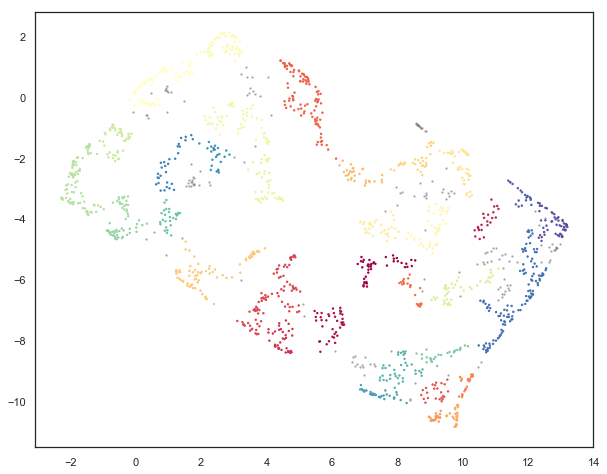

In [3]:
from sklearn.cluster import DBSCAN, KMeans, AffinityPropagation, MeanShift
import hdbscan
'''
HDBSCAN clusters in 2D
low min sample size seems to refuce unclustered data;
larger min cluster size decrease cluster numbers
'''
y_unsupervised = hdbscan.HDBSCAN(min_samples=3,min_cluster_size=20).fit_predict(trans)
 
sns.set(style='white', rc={'figure.figsize':(10,8)})
clustered = (y_unsupervised >= 0)
plt.scatter(trans[~clustered, 0],
            trans[~clustered, 1],
            c=(0.5, 0.5, 0.5),s=2,alpha=0.5)
plt.scatter(trans[clustered, 0],
            trans[clustered, 1],
            c=y_unsupervised[clustered],s=2,cmap='Spectral');
# plt.scatter(trans[:, 0],
#             trans[:, 1],
#             c=(0.5, 0.5, 0.5),s=2,alpha=0.5)

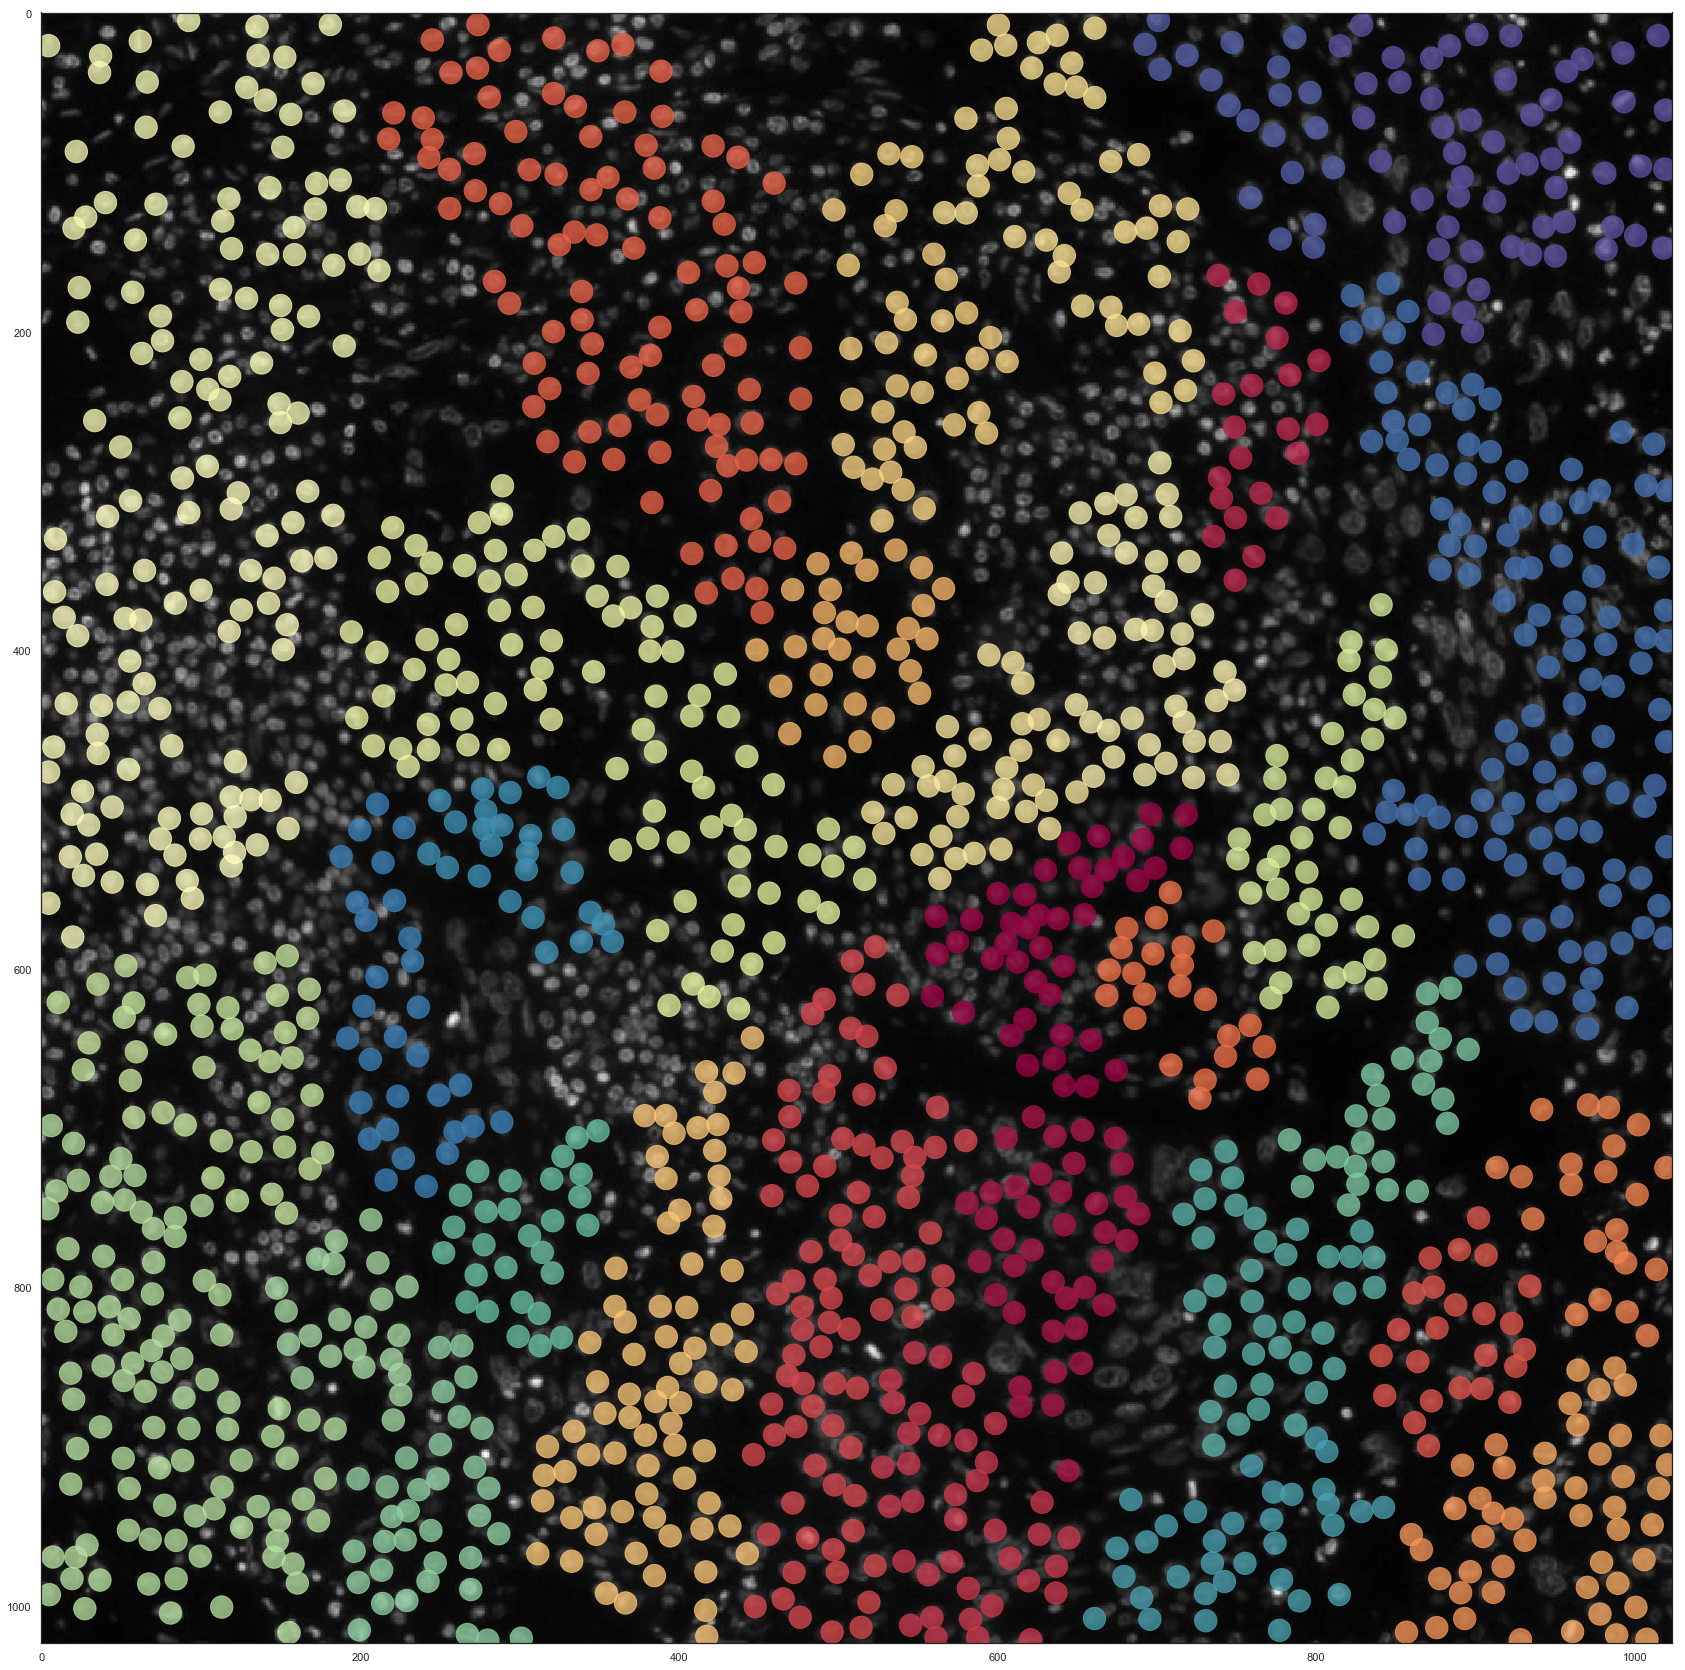

In [4]:
image = imageio.imread('/home/garner1/Work/dataset/cellImages/image52/iMS266_20190426_001.sub52.jpg')
sns.set(style='white', rc={'figure.figsize':(50,30)})

plt.scatter(X[clustered,0].astype(np.float),
            X[clustered,1].astype(np.float),
            c=np.asarray(y_unsupervised)[clustered],
            s=500,
            cmap='Spectral',
            alpha=0.75);
plt.imshow(image,cmap='gray')
plt.show()

In [5]:
'''
Returns
-------
fuzzy_simplicial_set: coo_matrix
A fuzzy simplicial set represented as a sparse matrix. The (i,
j) entry of the matrix represents the membership strength of the
1-simplex between the ith and jth sample points.
'''
mat = umap.umap_.fuzzy_simplicial_set(
    X,
    n_neighbors,
    random_state=np.random.RandomState(seed=42),
    metric='euclidean',
    metric_kwds={},
    knn_indices=None,
    knn_dists=None,
    angular=False,
    set_op_mix_ratio=1.0,
    local_connectivity=1.0,
    verbose=False
)

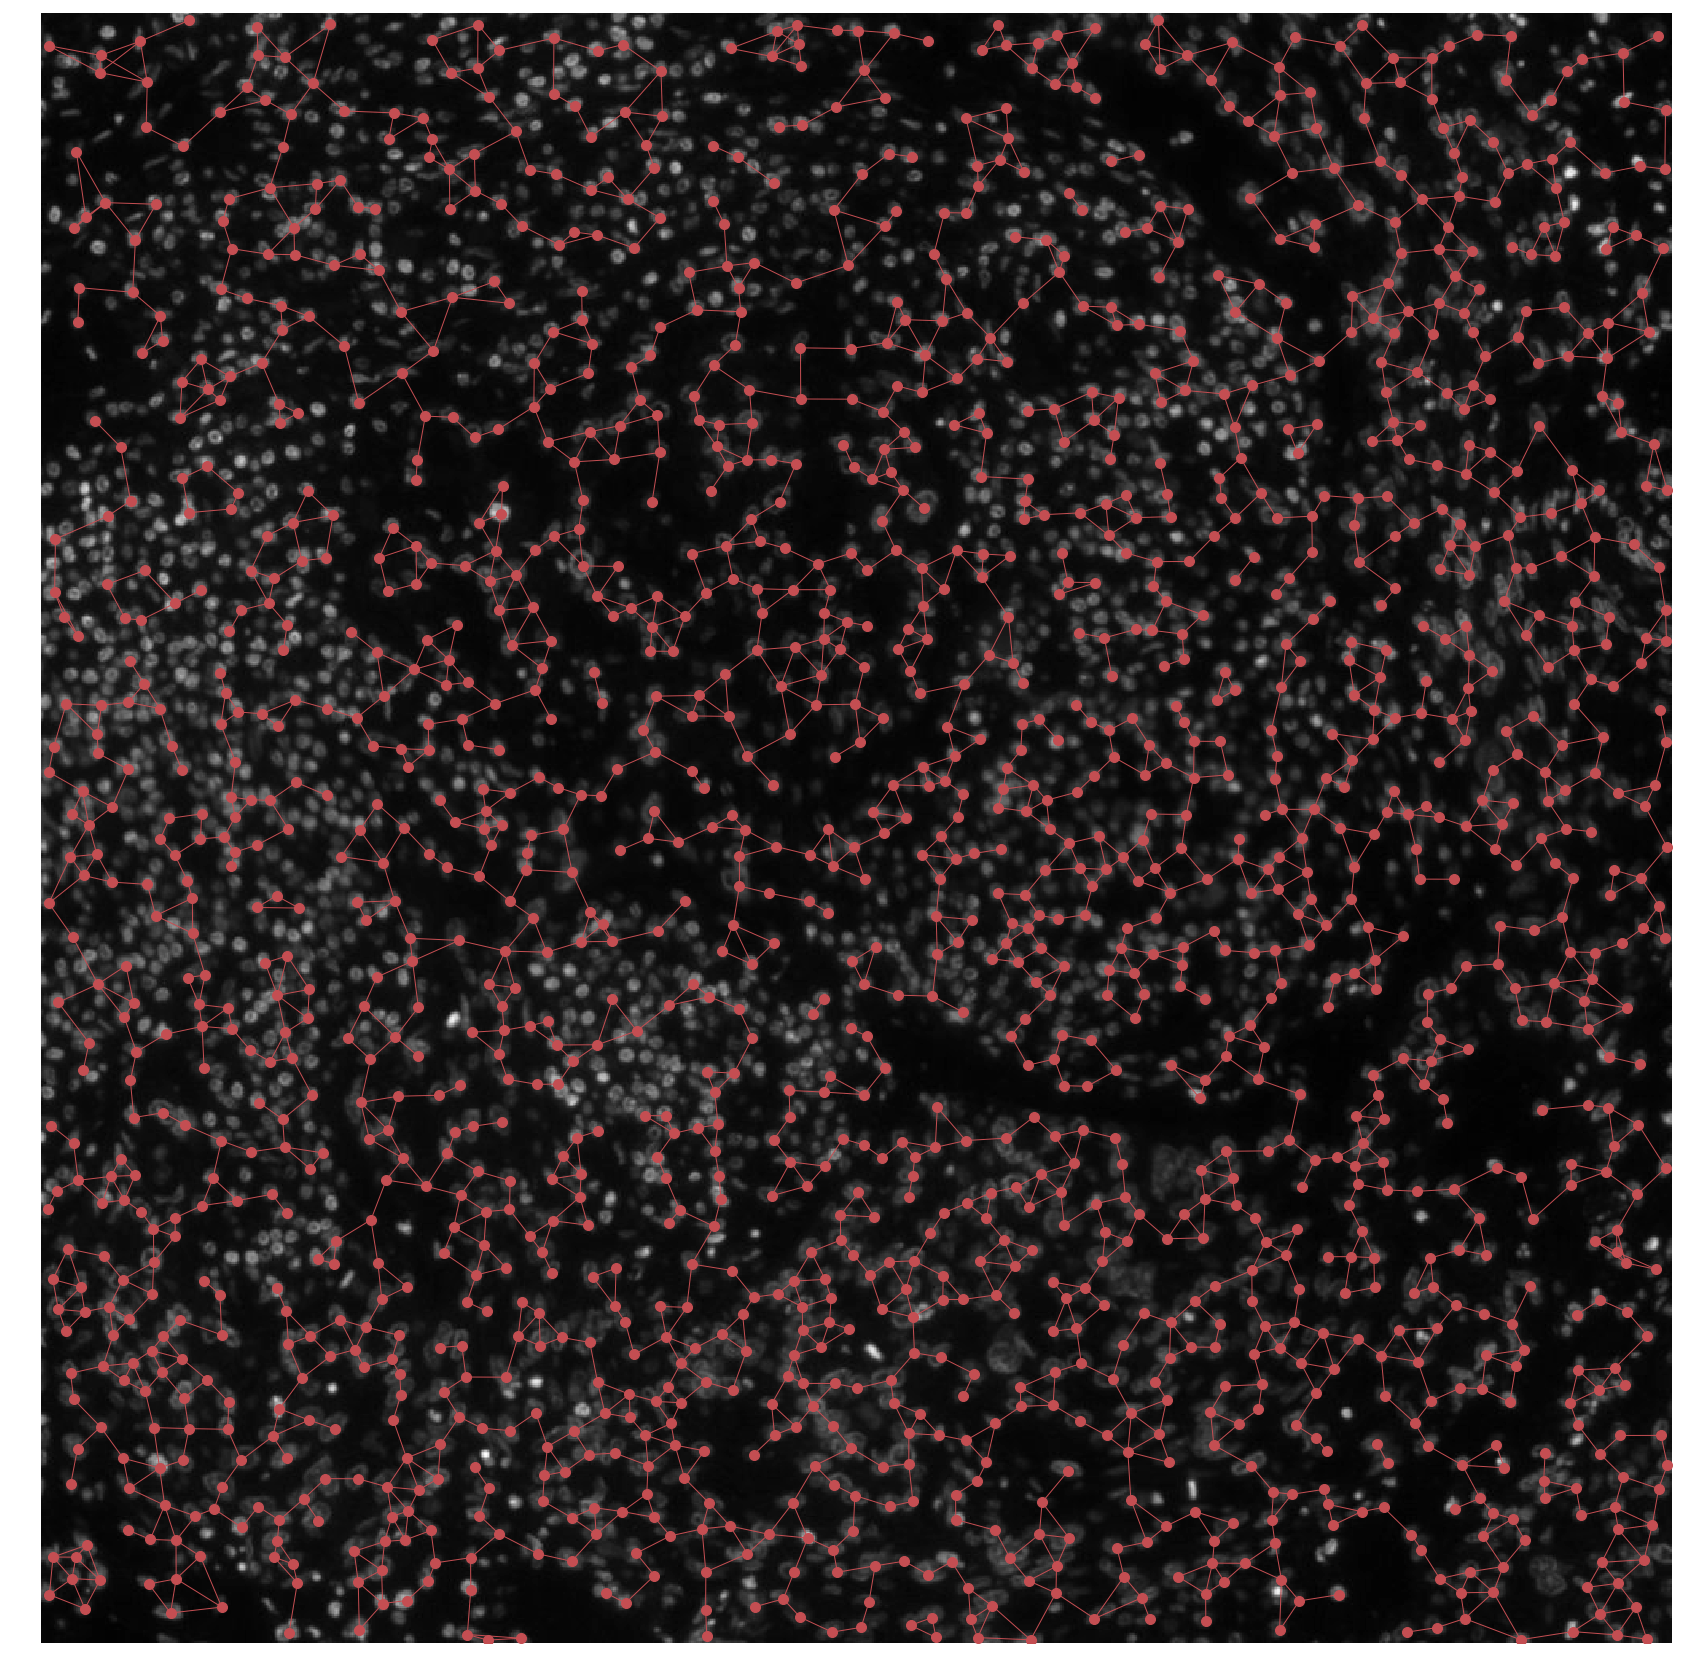

In [6]:
import networkx as nx
sns.set(style='white', rc={'figure.figsize':(50,30)})
G = nx.from_scipy_sparse_matrix(mat)
eset = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.75]
# pos = nx.spring_layout(G)  # positions for all nodes
pos = X
# nodes
nx.draw_networkx_nodes(G, pos, node_size=100,alpha=1.0)
# edges
nx.draw_networkx_edges(G, pos, edgelist=eset,alpha=1.0, edge_color='r')
# nx.draw_networkx_edges(G, pos, edgelist=esmall,
#                        width=6, alpha=0.5, edge_color='b', style='dashed')
# labels
# nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')
plt.axis('off')
plt.imshow(image,cmap='gray')
plt.show()
